# Generate Random Sequences

The following function generate random sequences of bases (A, C G, T) and stores these in a text file. Each sequence is a string or 25 bases with each base chosen randomly with 25% probability.

In [1]:
import random as rnd

def generate_seq(outfile, size, rows):
    rnd.seed()
    f = open(outfile, 'w')
    for i in xrange(rows):
        dna = ''
        for i in xrange(size):
            dna += rnd.choice(['A','C','G','T'])

        f.write(dna)
        f.write('\n')
    
    f.close()

In [2]:
# this generates 2500 sequesces of length 25 each
generate_seq("dna.txt",25,2500)

# DNA Sequence Arrangement

I've implemented a Monte Carlo method to arrange the DNA sequences on a square grid. It can be thought of as a cooling process. We start by randomly assigning all the sequences to the grid. We then calculate the average distance of sequence in each cell from adjacent cells. Note that the _penalty score_ defined in the challenge is simply the hamming distance between two strings. This average hamming distance for each cell can be thought of temperature at that cell. The Monte Carlo algorithm them seeks an arrangement that lowers the temperature at each cell.

This MC algorithm works in the following way
- pick two cells on the grid at random 
- calculate the average local distance of both cells. 
- swap the contents of the cell 
- calculate the average local distance of both cells after swap 
- if the average local distance becomes smaller for both cell after swap, then accept new arrangement, else, discard the change. 
- repeat for fixed number of iteration 


## Test Case

Before running the algorithm for random sequences generated above, I would like to explore the working of the algorithm for a test case where there are only four types of sequences generated by the following function. In this case the the penalty score is either $0$ or $25$.

In [3]:
#test case. generate 400 sequences

f = open('test.txt', 'w')
for i in xrange(100):
    f.write('AAAAAAAAAAAAAAAAAAAAAAAAA\n')
    f.write('CCCCCCCCCCCCCCCCCCCCCCCCC\n')
    f.write('GGGGGGGGGGGGGGGGGGGGGGGGG\n')
    f.write('TTTTTTTTTTTTTTTTTTTTTTTTT\n')
    
f.close()

19.0


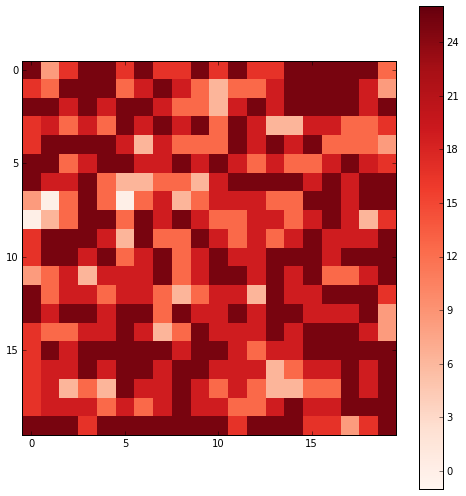

In [4]:
# create a dna object using test data
from dna import DNA
import numpy as np
%matplotlib inline

dtest = DNA('test.txt')
dtest.hamming_dist_all()

dtest.plot_heat_map()
print np.average(dtest.heat_map()) #average temperature of the heat map

This heat map shows the state of the grid when the sequences are assigned to the cells at random. The average temperature of the heat map is 19. Now, I'll run the MC algorithm to see how the system evolves.

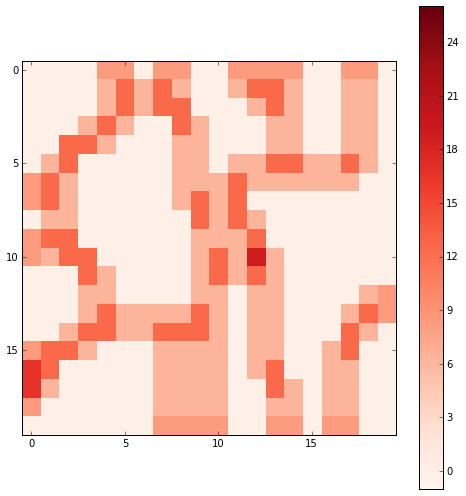

In [6]:
dtest.clusterify(100000)
dtest.plot_heat_map()

As one can see from the above heat map, the MC algorithm nicely creates __islands__ of similar sequences, which are shown here in light colors. The average temperate of the heat map is now 3.1.

There are disadvantages of this method. In the test case, one would expect four regions only. But the MC algorithm can generate more than four islands, but putting identical sequences in separate islands. Secondly, the shape of these islands is completely random. 

In [7]:
print np.average(dtest.heat_map()) #average temperature of the heat map

3.96875


# Main Case

Here I'll use the MC algorithm to analyze the random sequences generated in the first part.

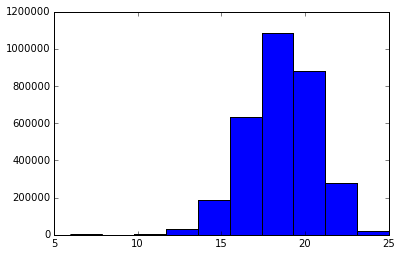

In [8]:
d = DNA('dna.txt')
d.hamming_dist_all() # this step takes a bit long

#plot histogram of all possible distances.
d.hamming_hist()

18.7645666667


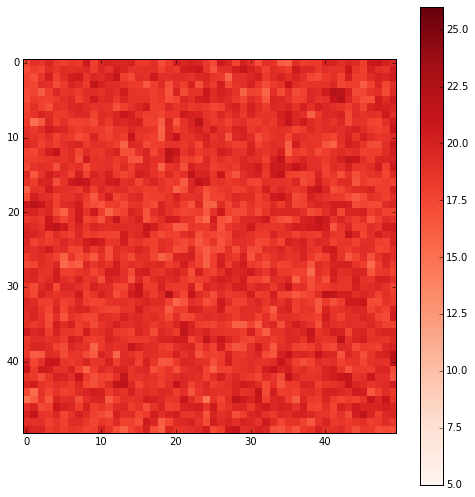

In [9]:
# heat map for the random sequences
d.plot_heat_map()
print np.average(d.heat_map())

The average temperature of the heat map is 18.7

The following plot shows the histogram of the average local distances (temperature) for each cell.

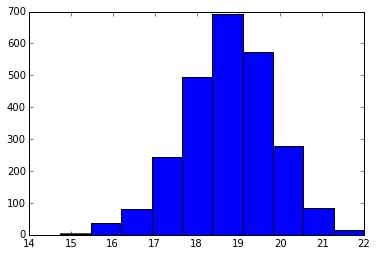

In [10]:
d.local_avg_hist()

Now, I'll run the MC algorithm. I'll also explore how many iterations are needed for the system to reach an equilibrium state.

In [11]:
temp = []
for i in range(5000):
    d.clusterify(10000)
    temp.append(np.average(d.heat_map()))

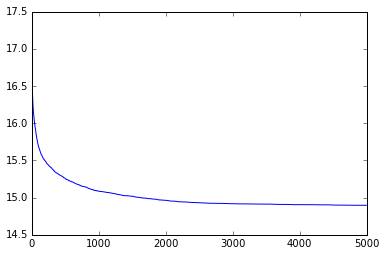

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp)), temp)

From this plot, we can see how the system cools down. The system almost reaches an equilibrium after 3e7 iterations. It takes almost 20 min to run on single core. Like several other MC algorithms, this is one big disadvantage of this algorithm. It cannot be parallelized to take advantage of multiple processors.

Following is the heat map for the equilibrium state. The average temperature has dropped to 14.9 from 18.7.

14.8965

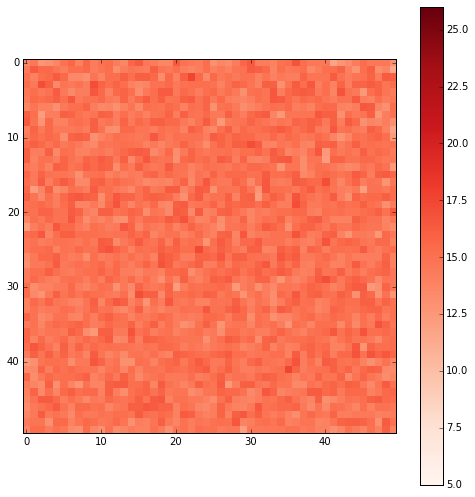

In [13]:
d.plot_heat_map()
np.average(d.heat_map())

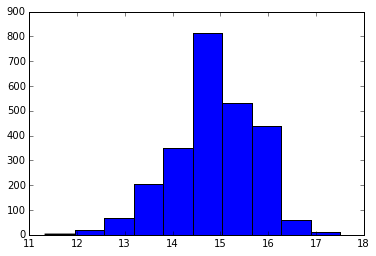

In [14]:
# histogram of temperature in equilibrium state.
d.local_avg_hist()

In [15]:
# write the final configuration to a text file

d.write('final_config.txt')